In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os, shutil
warnings.filterwarnings('ignore')



In [5]:
pathYes='brain_tumor/yes'
pathNo='brain_tumor/no'

In [6]:
#rename yes to Y_1

count=1
for i in os.listdir(pathYes):
  sourch=os.path.join(pathYes,i)
  destination=os.path.join(pathYes,'Y_'+str(count)+'.jpg')
  os.rename(sourch,destination)
  count+=1

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'brain_tumor/yes\\Y_10.jpg' -> 'brain_tumor/yes\\Y_2.jpg'

In [7]:
#rename No to N_1
pathNo='brain_tumor/no'
count=1
for i in os.listdir(pathNo):
  sourch=os.path.join(pathNo,i)
  destination=os.path.join(pathNo,'N_'+str(count)+'.jpg')
  os.rename(sourch,destination)
  count+=1

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'brain_tumor/no\\N_10.jpg' -> 'brain_tumor/no\\N_2.jpg'

In [8]:
lenYes= len(os.listdir('brain_tumor/yes'))
lenNo=len(os.listdir('brain_tumor/no'))
lenYes,lenNo

(155, 98)

In [9]:
plotDict = {'tumor': lenYes, 'non-tumor': lenNo}

In [10]:
X_axis=plotDict.keys()
Y_axis=plotDict.values()
print(X_axis)
print(Y_axis)

dict_keys(['tumor', 'non-tumor'])
dict_values([155, 98])


In [11]:
import tensorflow as tf
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau 


In [12]:
def timing(sec_elapsed):
    h = int(sec_elapsed / (60*60))
    m = int(sec_elapsed % (60*60) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m}:{s}"

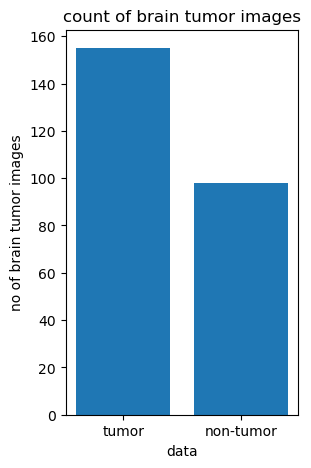

In [13]:
fig= plt.figure(figsize=(3,5))
plt.bar(X_axis, Y_axis)
plt.xlabel("data")
plt.ylabel("no of brain tumor images")
plt.title('count of brain tumor images')
plt.show()

In [1]:
pip install --upgrade numpy scipy

Note: you may need to restart the kernel to use updated packages.


In [19]:
import time
start_time = time.time()


augmented_data(file_dir = pathYes, n_generated_samples=6, save_to_dir=augmented_data_path+'yes')
augmented_data(file_dir = pathNo, n_generated_samples=9, save_to_dir=augmented_data_path+'no')

end_time = time.time()
execution_time = end_time - start_time
print(timing(execution_time))

0:1:19.420619249343872


In [17]:
augmented_data_path = 'brain_tumor/augmented_data'

In [17]:
def augmented_data(file_dir, n_generated_samples, save_to_dir):
    data_gen = ImageDataGenerator(rotation_range=10, 
                      width_shift_range=0.1,
                      height_shift_range=0.1,
                      shear_range=0.1,
                      brightness_range=(0.3, 1.0),
                      horizontal_flip=True,
                      vertical_flip=True,
                      fill_mode='nearest')
    for filename in os.listdir(file_dir):
        image = cv2.imread(file_dir + '/' + filename)
        image = image.reshape((1,) + image.shape)
        save_prefix = 'aug_' + filename[:-4]
        i=0
        for batch in data_gen.flow(x = image, batch_size = 1, save_to_dir = save_to_dir, save_prefix = save_prefix, save_format = "jpg"):
            i+=1
            if i>n_generated_samples:
                break

In [14]:
def data_summary(main_path):
    yes_path="augmented_data/yes"
    no_path="augmented_data/no"
    n_pos=len(os.listdir(yes_path))
    n_neg=len(os.listdir(no_path))
    n=(n_pos + n_neg)
    pos_per= n_pos*100/n
    neg_per= n_neg*100/n
    print(f"Total number of examples: {n}")
    print(f"Number of positive examples: {n_pos} ({pos_per:.2f}%)")
    print(f"Number of negative examples: {n_neg} ({neg_per:.2f}%)")

In [18]:
data_summary(augmented_data_path)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'augmented_data/yes'